#**Name:** Varsha
#**Roll No:** 200030040

##**AIM**



*   To identify optimal sampling frequency for speech signal processing.
*   To identify optimal bit resolution for speech signal processing




## **THEORY**



*   In this lab, we had to record 'Speech' at 44.1kHz kHz and 16 bits to analyse it with different sampling frequency and bit resolutions.
*   Nyquist's theorem states that a periodic signal must be sampled at more than twice the highest frequency component of the signal. If the sampling rate is chosen too low and violates the Nyquist criterion, aliasing will occur. Aliasing results in the folding of higher-frequency components into lower-frequency regions, leading to distortion and inaccuracies in the reconstructed signal.
*   Zero crossing rate is the number of times the waveform crosses the time axis. Even this is calculated over short intervals of time. (Each sine wave has zero crossing =2)
*   The bit resolution of a speech signal, often referred to as "bit depth" or "quantization bit depth," is a parameter that determines the precision with which the amplitude values of the analog speech signal are represented in its digital form. In other words, it defines the number of bits used to encode the amplitude of each sample in the digitized signal.
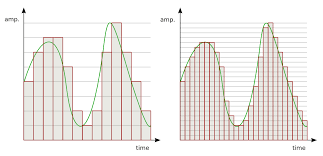
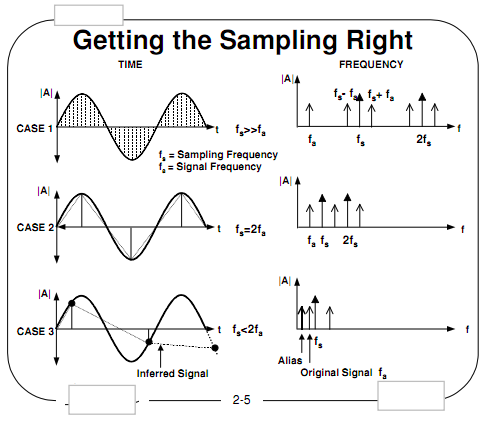

##**EXPERIMENTAL PROCEDURE:**



*   Upload the audio file in .wav format.
*   Plot the time domain and frequency domain plots of the whole audio file using librosa and numpy.
*   Identify the timestamps for /s/, /ch/, /E/, /n/, silence from the audio file.
*   Change the sampling frequency from 44kHz to 16kHz to 4kHz and plot the frequency domain graphs for /s/, /ch/ and /E/ for each of the frequencies.
*   Change the bit resolution for 16kHz signal from 16 bit to 8 bit to 4 bit to 1c bit.




##**OBSERVATIONS / CONCLUSIONS:**



*   Sampling frequency:
      *    We observe that with decrease in frequency the audio clarity decreases as expected from theory. But from 44kHz to 16kHz the audio clarity remains the same, this can be explained using Nyquist theorem covered in the theory.
      *    Vowels have lower frequency when compared to other sounds. So we observe that with decreasing sampling frequency we first loose /s/ and /ch/ sounds due to aliasing of their high frequency signals.
      
*   Bit resolution:
       *   We observe that with decrease in bit resolution, the audio clarity is reduced as exected from theory. But 18 to 8 bits is almost the same.
       *   With decrease in bit resolution, the lower amplitude sounds are rounded off to zero.


**Drive link :**https://drive.google.com/file/d/1_4elgG0-x_xUbDtHj_wLVzjAnZ0eRu3W/view?usp=sharing

##**CODE:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
import librosa
import librosa.display
import math

##**SAMPLING FREQUENCY**

In [ ]:
speech_freq,freq= librosa.load('/content/drive/MyDrive/SP_Lab_Assignments/speech.wav')
ipd.Audio(speech_freq, rate=freq)

##**44kHz FREQUENCY**

In [ ]:
def magnitudeSpectrum(sound):
  sound_len = sound.shape[0]
  print(sound_len)
  sound_dtft = fft(sound)
  freqs = fftfreq(sound_len, 1/freq)
  freqs = freqs[0:sound_len//2]
  dtft_lin = np.abs(sound_dtft[0:sound_len//2])
  dtft_db = 20*np.log10(np.abs(sound_dtft[0:sound_len//2]))
  return freqs,dtft_lin,dtft_db

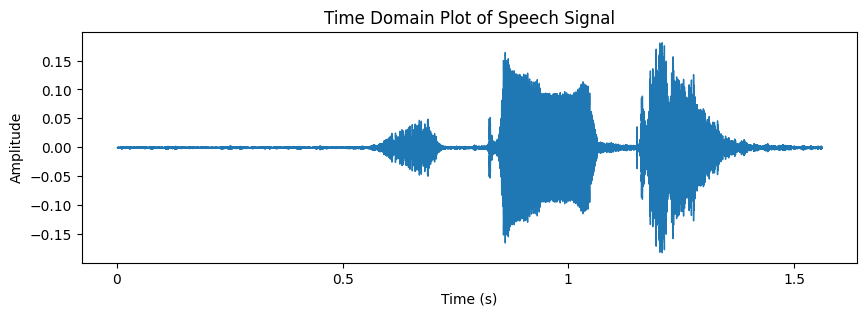

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(speech_freq, sr=freq);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(speech_freq)

34415


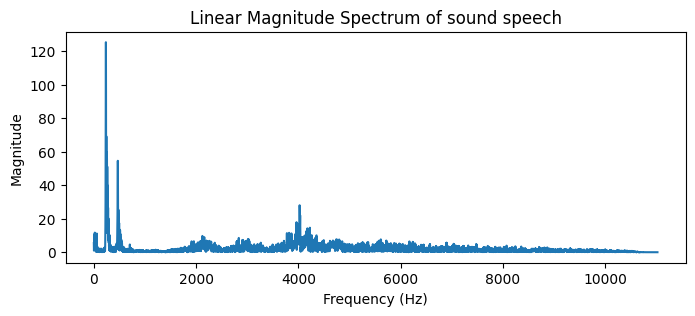

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound speech")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

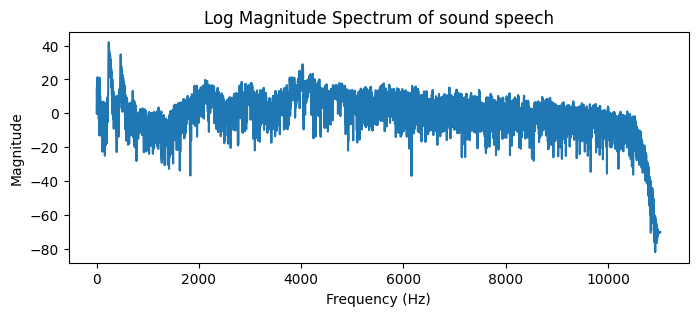

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound speech")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

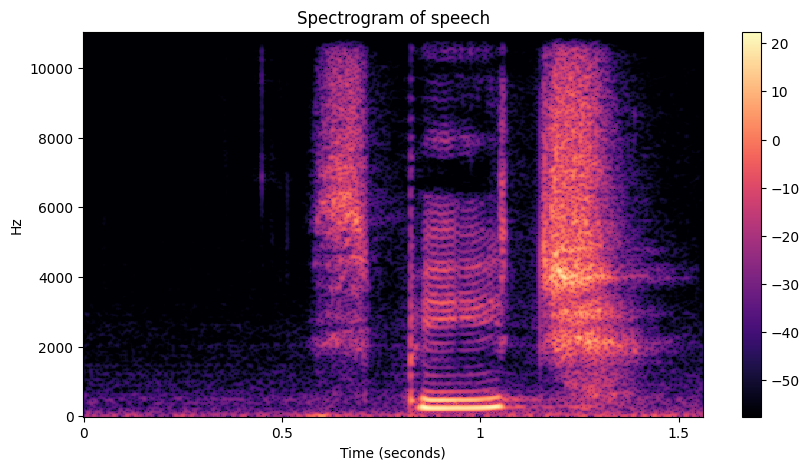

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(speech_freq, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=freq,hop_length=frame_rate)
plt.title("Spectrogram of speech")
plt.colorbar()
plt.show()

In [ ]:
s = speech_freq[int(0.4 * freq): int(0.79 * freq)]
ipd.Audio(s, rate=freq)

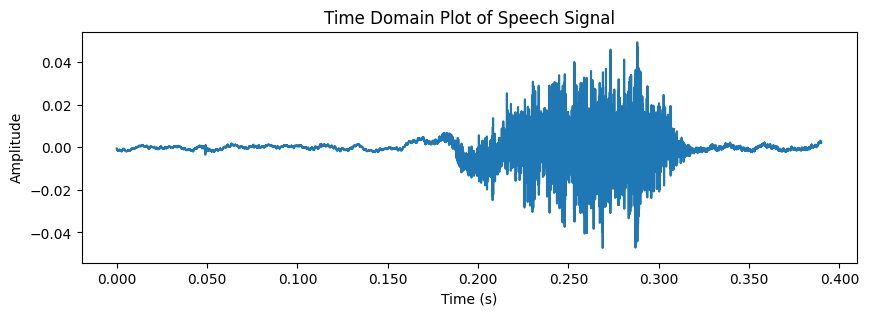

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(s, sr=freq);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(s)

8599


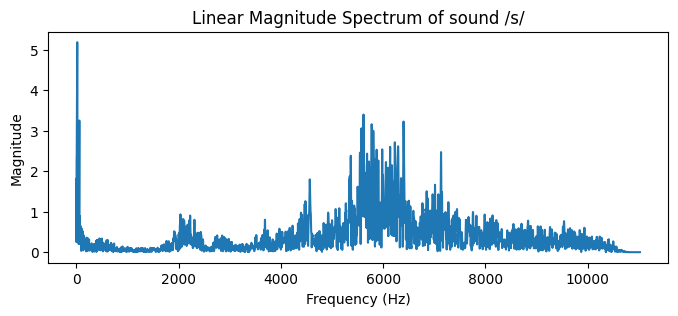

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

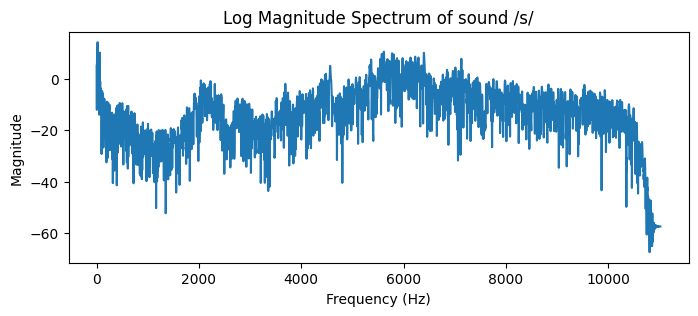

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

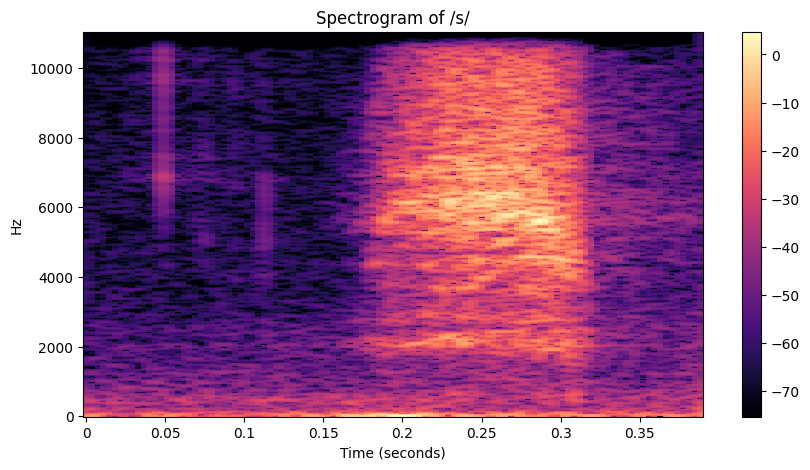

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(s, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=freq,hop_length=frame_rate)
plt.title("Spectrogram of /s/")
plt.colorbar()
plt.show()

In [ ]:
E = speech_freq[int(0.85 * freq): int(1.04 * freq)]
ipd.Audio(E, rate=freq)

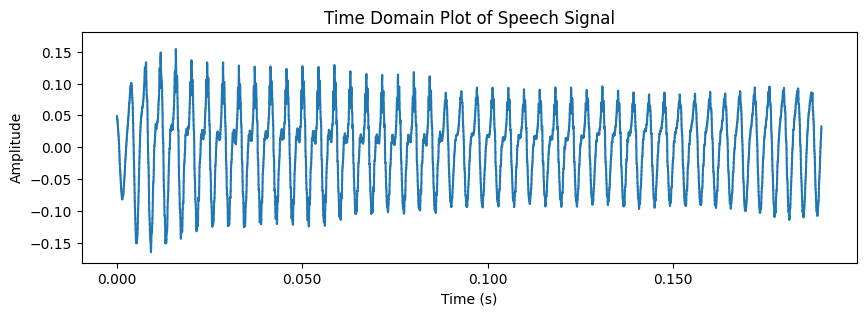

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(E, sr=freq);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(E)

4190


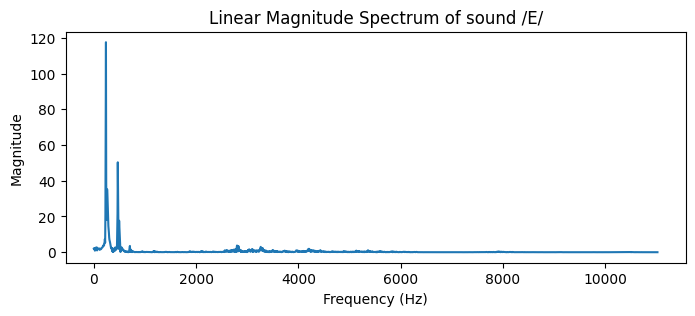

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

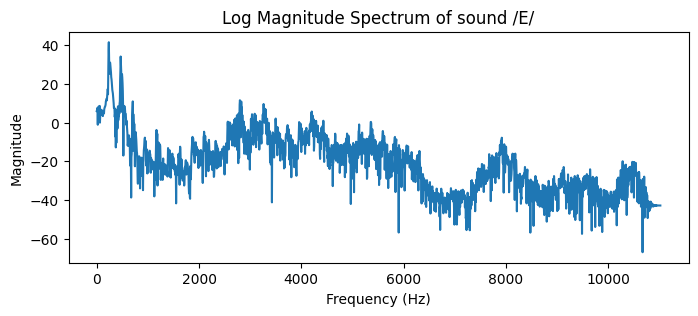

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

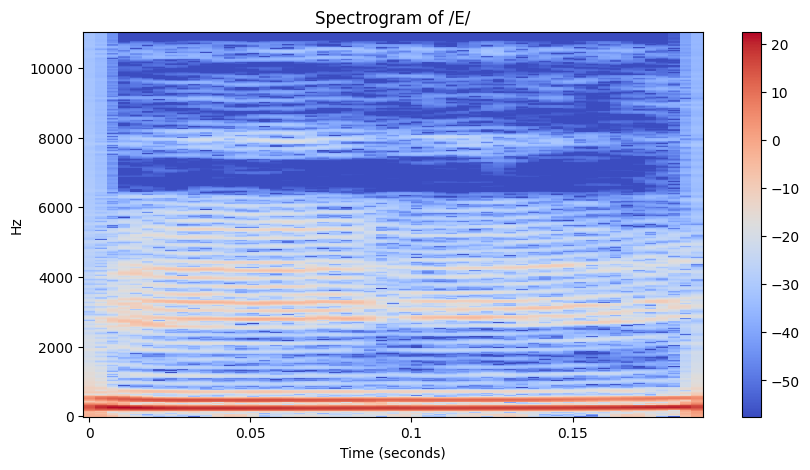

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(E, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=freq,hop_length=frame_rate)
plt.title("Spectrogram of /E/")
plt.colorbar()
plt.show()

In [ ]:
ch = speech_freq[int(1.06 * freq): int(1.5 * freq)]
ipd.Audio(ch, rate=freq)

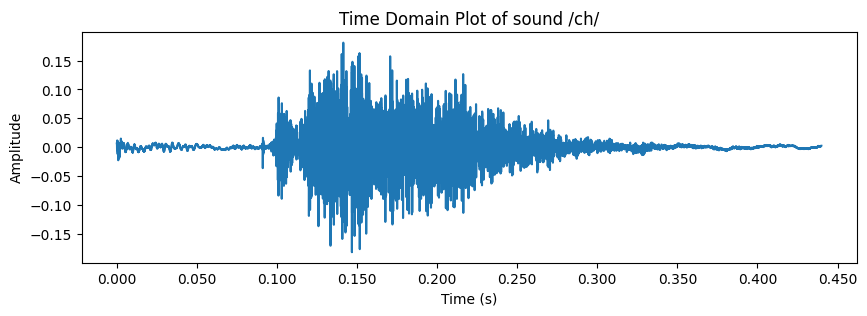

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(ch, sr=freq);
plt.title("Time Domain Plot of sound /ch/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(ch)

9702


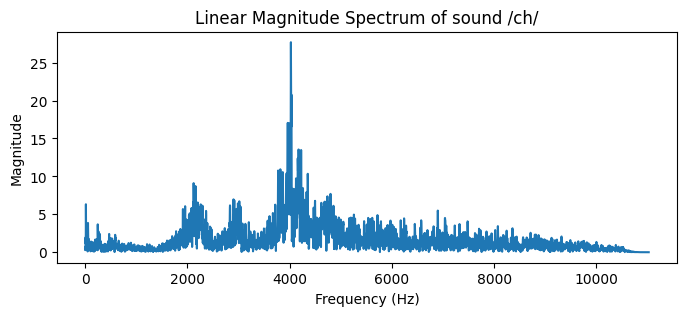

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

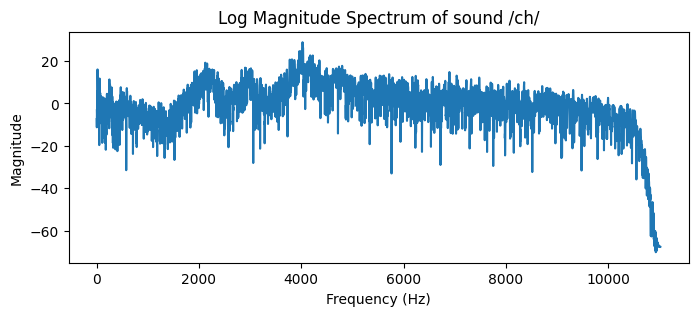

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

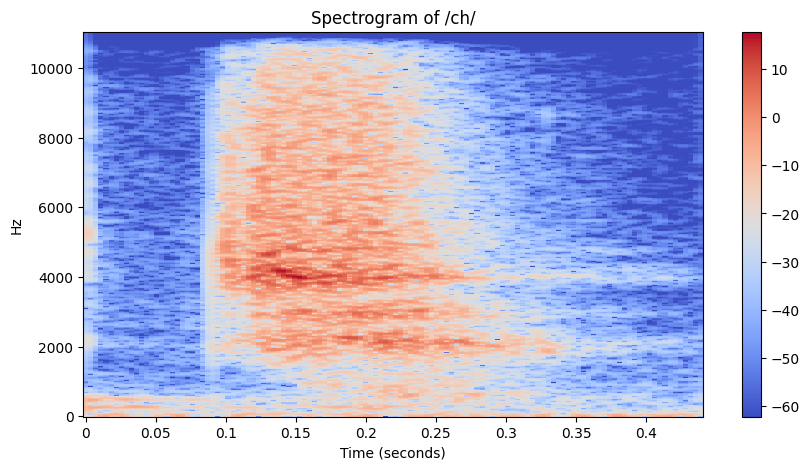

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(ch, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=freq,hop_length=frame_rate)
plt.title("Spectrogram of /ch/")
plt.colorbar()
plt.show()

##**16kHz FREQUENCY**

In [ ]:
speech_file_16k,sr1= librosa.load('/content/drive/MyDrive/SP_Lab_Assignments/speech.wav',sr=16000)
ipd.Audio(speech_file_16k, rate=sr1)

In [ ]:
s = speech_file_16k[int(0.4 * sr1): int(0.79 * sr1)]
ipd.Audio(s, rate=sr1)

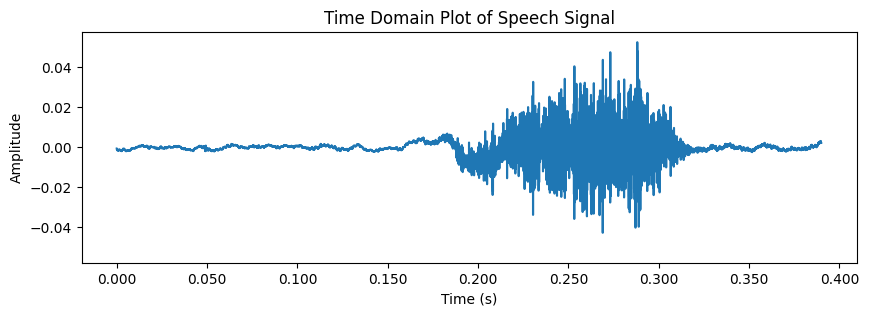

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(s, sr=sr1);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(s)

6240


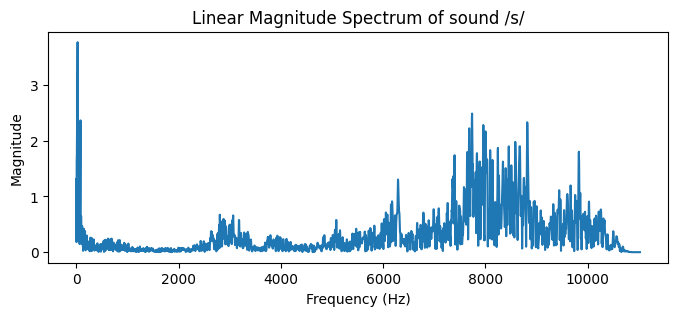

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

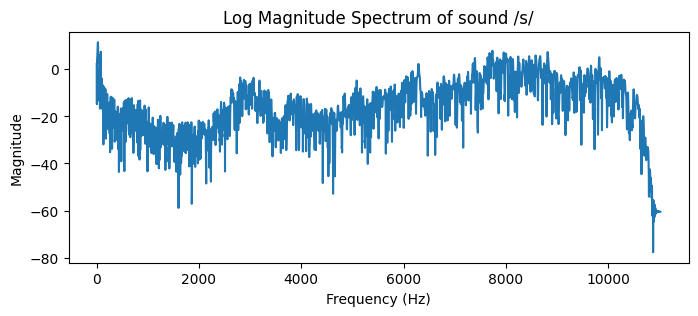

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

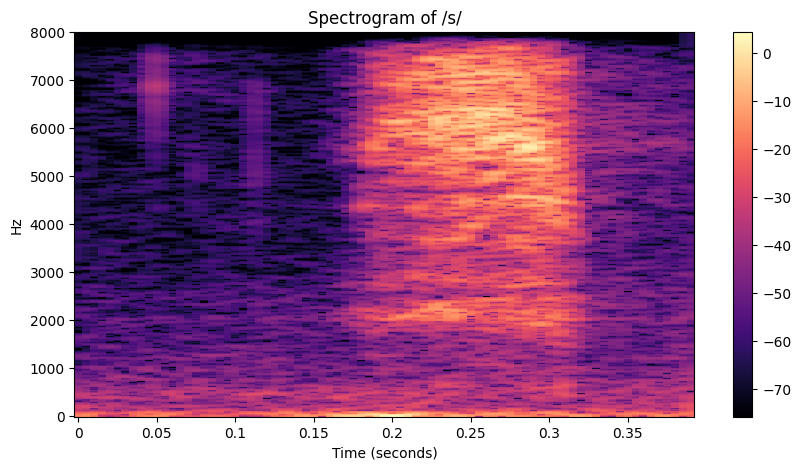

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(s, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr1,hop_length=frame_rate)
plt.title("Spectrogram of /s/")
plt.colorbar()
plt.show()

In [ ]:
E = speech_file_16k[int(0.855 * sr1): int(1.15 * sr1)]
ipd.Audio(E, rate=sr1)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(E)

4720


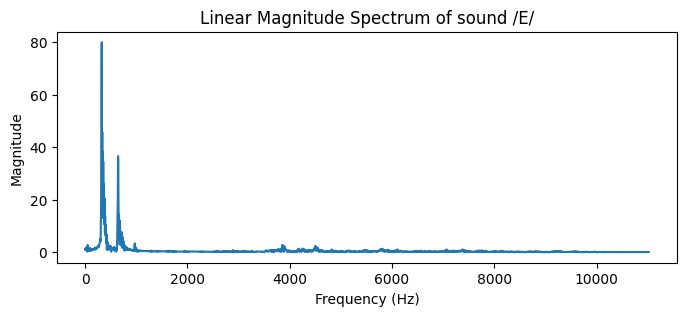

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

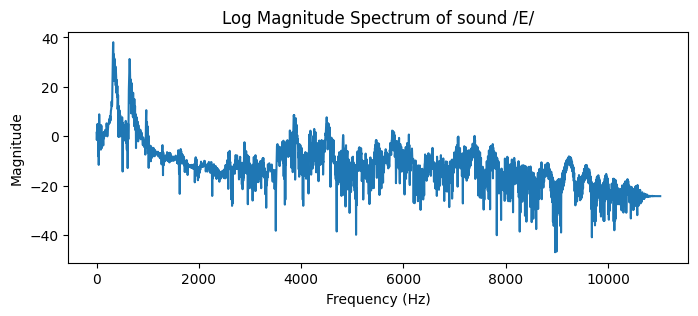

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

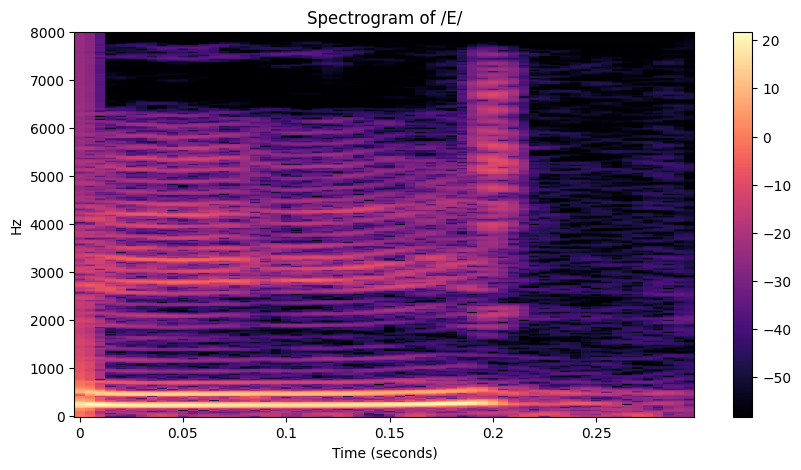

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(E, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr1,hop_length=frame_rate)
plt.title("Spectrogram of /E/")
plt.colorbar()
plt.show()

In [ ]:
ch = speech_file_16k[int(1.06 * sr1): int(1.5 * sr1)]
ipd.Audio(ch, rate=sr1)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(ch)

7040


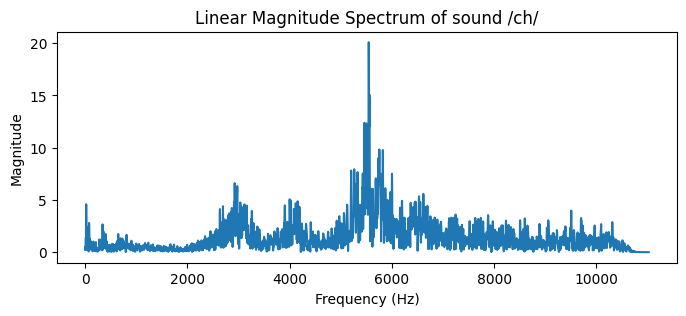

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

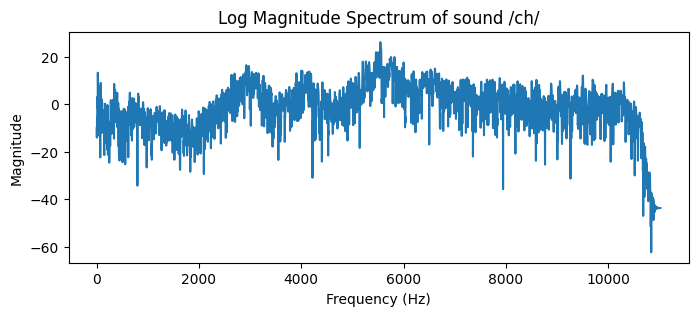

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

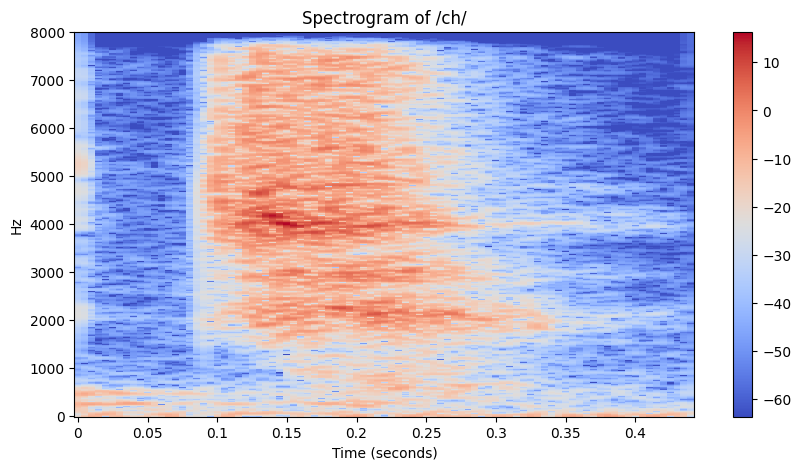

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(ch, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr1,hop_length=frame_rate)
plt.title("Spectrogram of /ch/")
plt.colorbar()
plt.show()

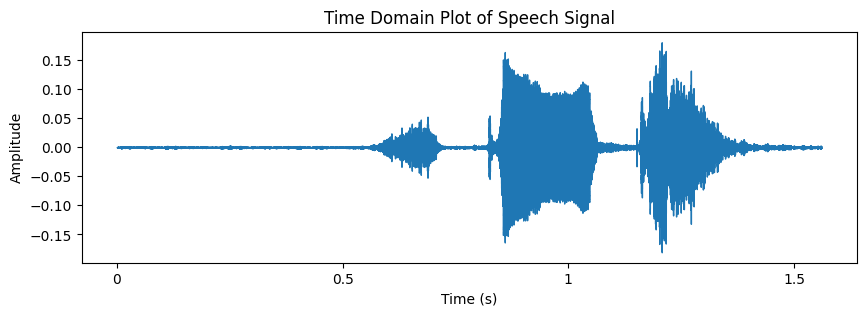

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(speech_file_16k, sr=sr1);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##**4kHz FREQUENCY**

In [ ]:
speech_file_4k,sr_4= librosa.load('/content/drive/MyDrive/SP_Lab_Assignments/speech.wav',sr=4000)
ipd.Audio(speech_file_4k, rate=sr_4)

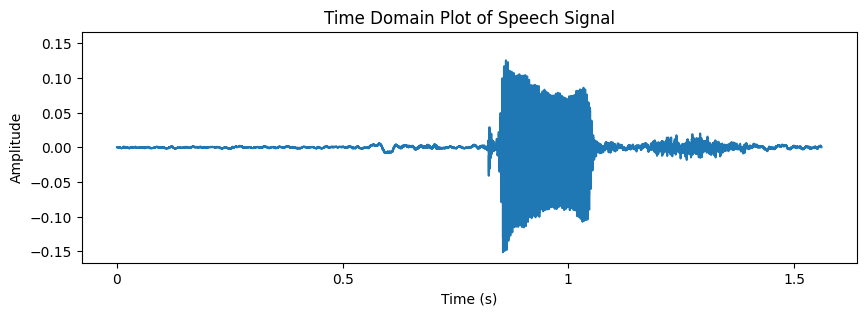

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(speech_file_4k, sr=sr_4);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
s = speech_file_16k[int(0.4 * sr_4): int(0.79 * sr_4)]
ipd.Audio(s, rate=sr_4)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(s)

1560


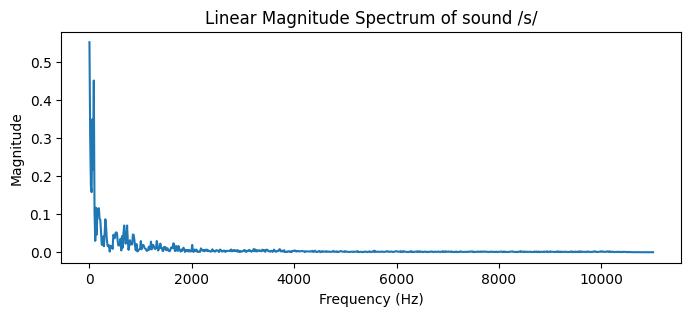

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

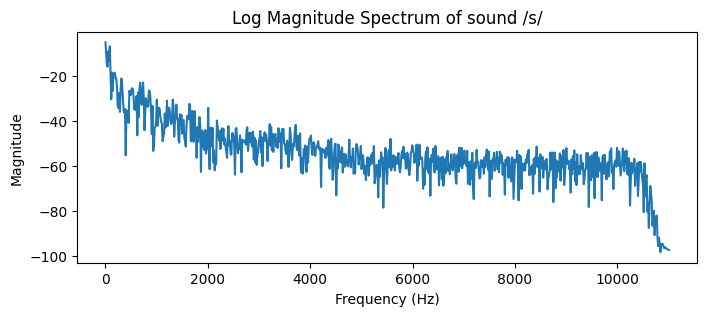

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

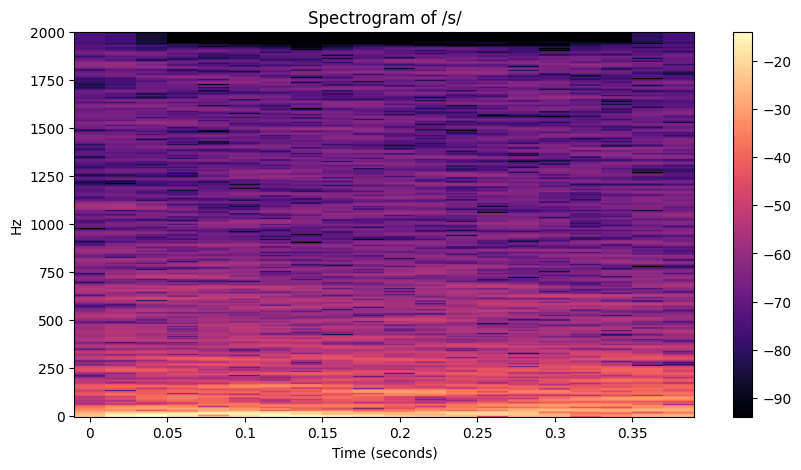

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(s, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr_4,hop_length=frame_rate)
plt.title("Spectrogram of /s/")
plt.colorbar()
plt.show()

In [ ]:
E = speech_file_16k[int(0.855 * sr_4): int(1.15 * sr_4)]
ipd.Audio(E, rate=sr_4)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(E)

1180


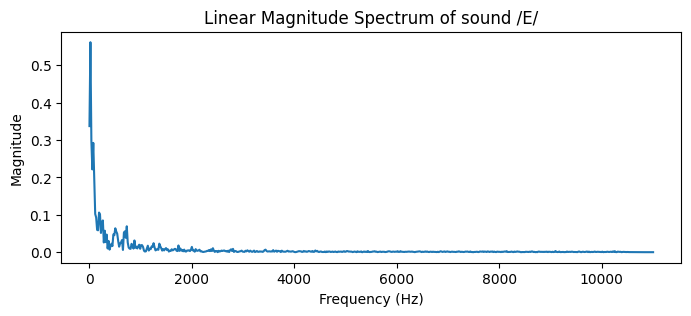

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

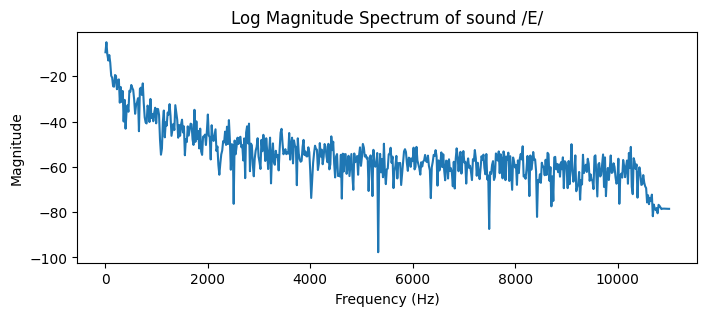

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

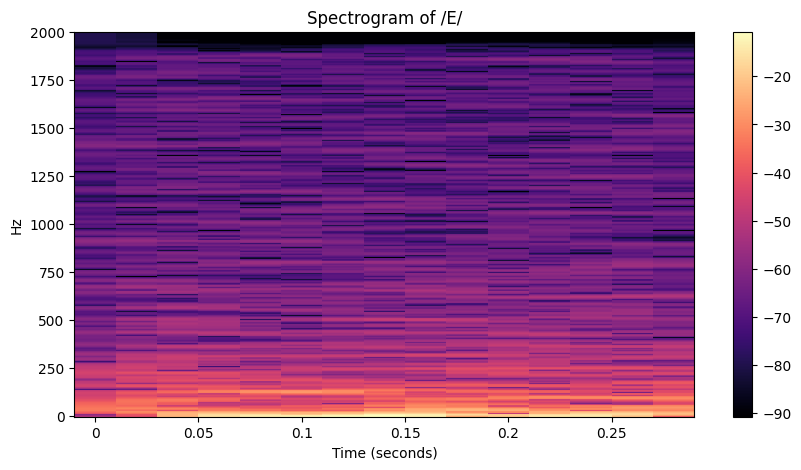

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(E, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr_4,hop_length=frame_rate)
plt.title("Spectrogram of /E/")
plt.colorbar()
plt.show()

In [ ]:
ch = speech_file_16k[int(1.06 * sr_4): int(1.5 * sr_4)]
ipd.Audio(ch, rate=sr_4)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(ch)

1760


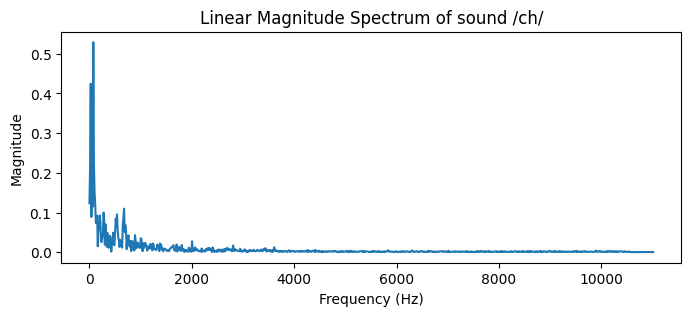

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

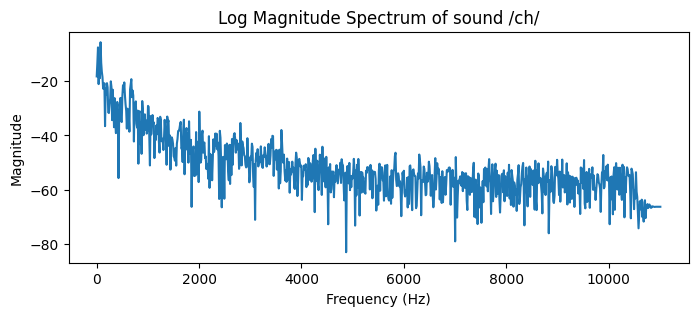

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

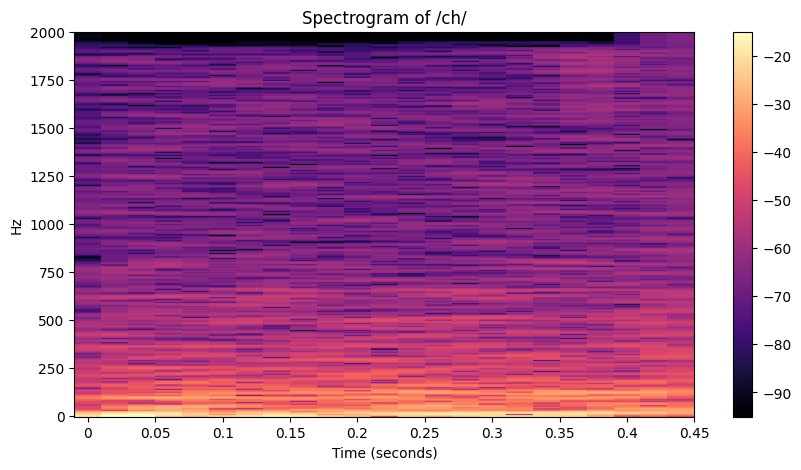

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(ch, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr_4,hop_length=frame_rate)
plt.title("Spectrogram of /ch/")
plt.colorbar()
plt.show()

##**BIT RESOLUTION**

In [ ]:
def bit_res(speech, n):
    maxVal = np.max(np.abs(speech))
    temp = speech / maxVal
    temp = np.around(temp * (2**(n - 1)))
    temp /= 2**(n - 1)
    r = temp * maxVal
    return r

In [ ]:
speech_file,sr= librosa.load('/content/drive/MyDrive/SP_Lab_Assignments/speech.wav',sr=16000)
ipd.Audio(speech_file, rate=sr)

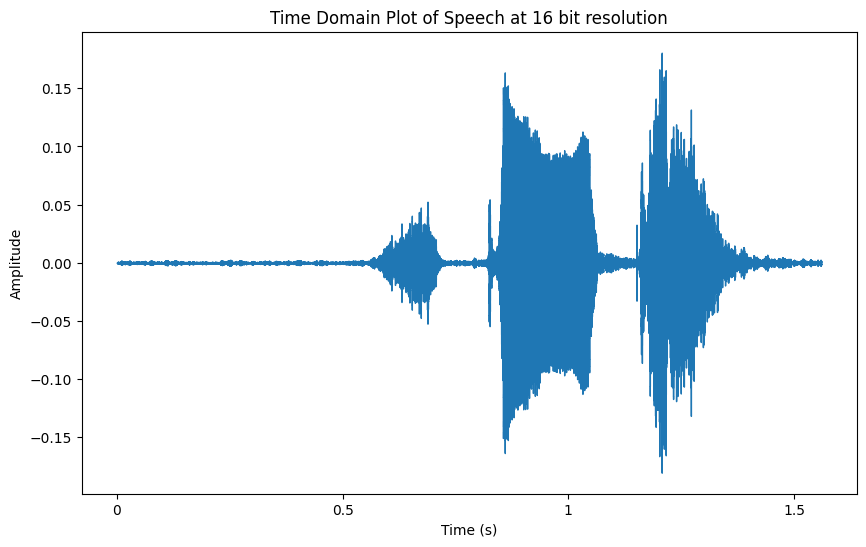

In [ ]:
plt.figure(figsize=(10,6))
librosa.display.waveshow(speech_file, sr=sr);
plt.title("Time Domain Plot of Speech at 16 bit resolution")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##**8 BIT RESOLUTION**

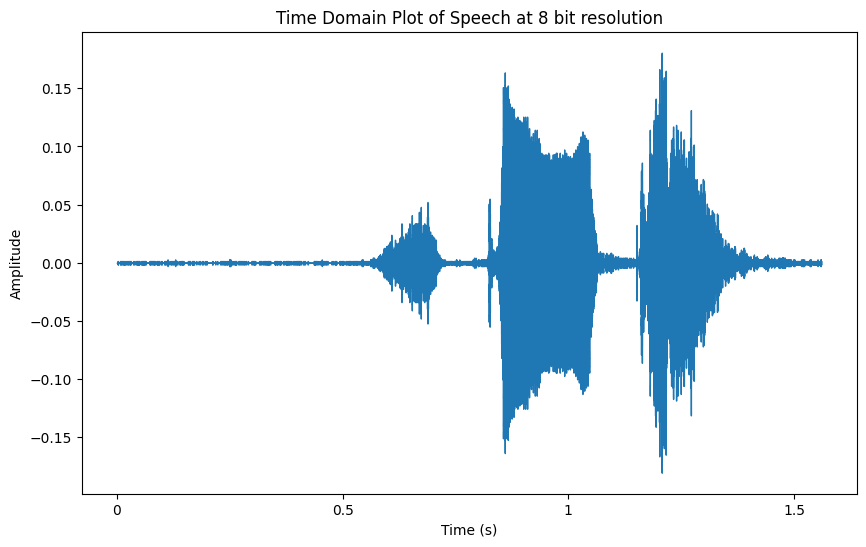

In [ ]:
speech8bits = bit_res(speech_file,8)
plt.figure(figsize=(10,6))
librosa.display.waveshow(speech8bits, sr=sr);
plt.title("Time Domain Plot of Speech at 8 bit resolution")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
ipd.Audio(speech8bits, rate=sr)

In [ ]:
s = speech8bits[int(0.4 * sr): int(0.79 * sr)]
ipd.Audio(s, rate=sr1)

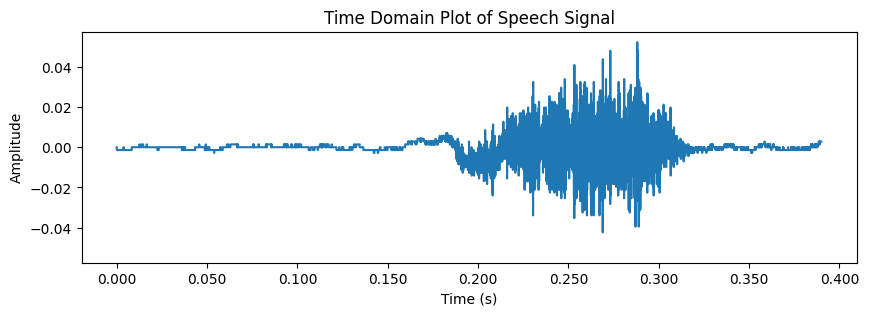

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(s, sr=sr);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(s)

6240


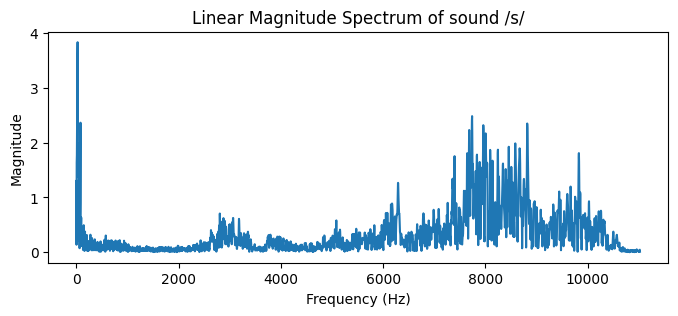

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

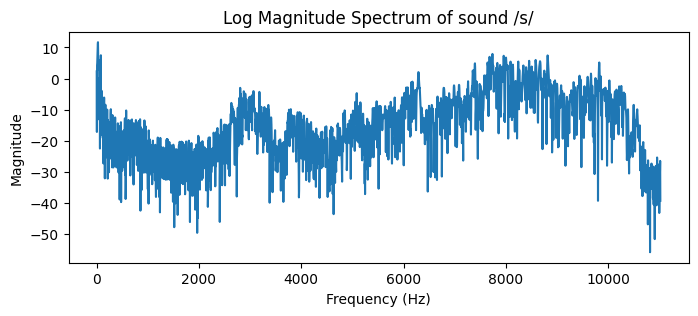

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

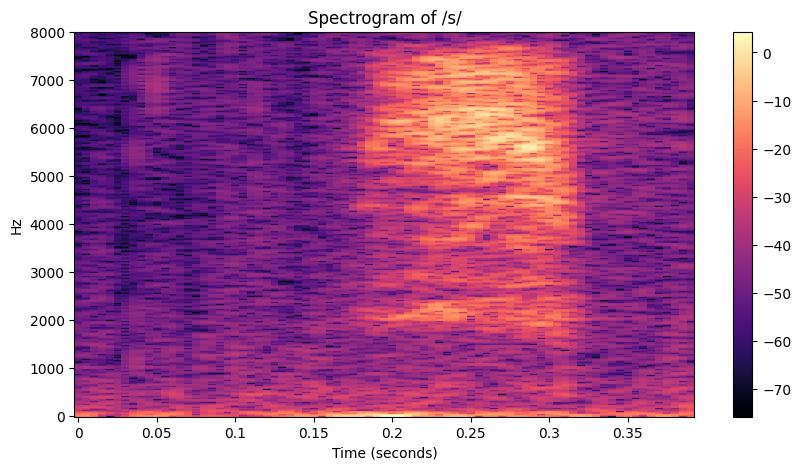

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(s, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /s/")
plt.colorbar()
plt.show()

In [ ]:
E = speech8bits[int(0.855 * sr): int(1.15 * sr)]
ipd.Audio(E, rate=sr1)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(E)

4720


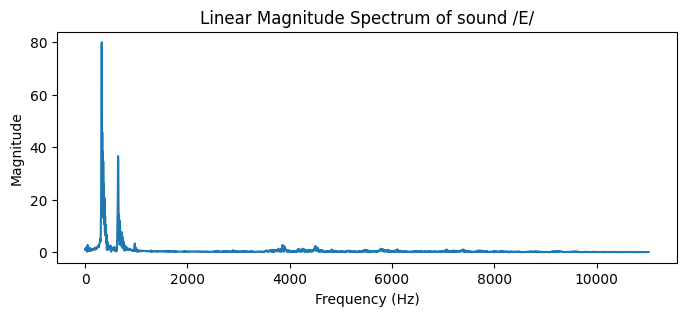

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

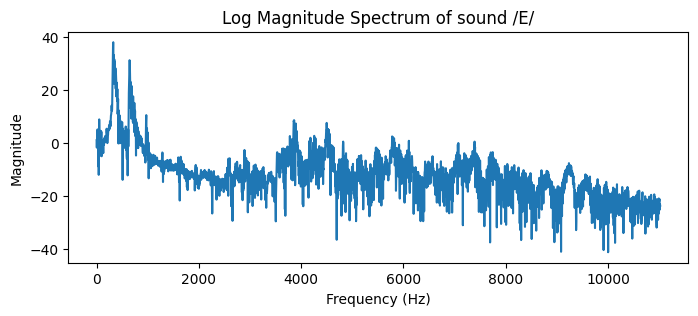

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

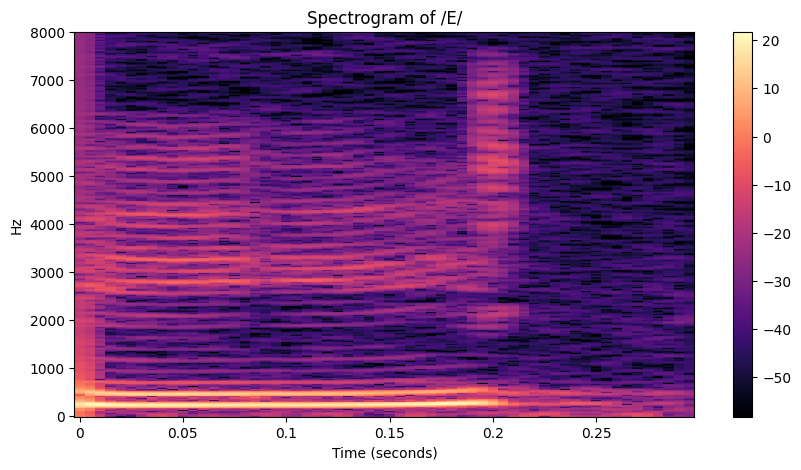

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(E, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /E/")
plt.colorbar()
plt.show()

In [ ]:
ch = speech8bits[int(1.06 * sr): int(1.5 * sr)]
ipd.Audio(ch, rate=sr)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(ch)

7040


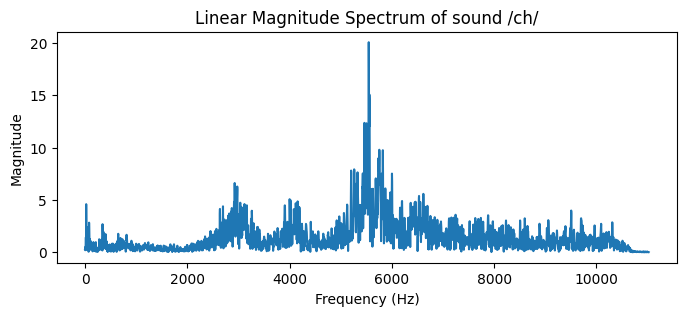

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

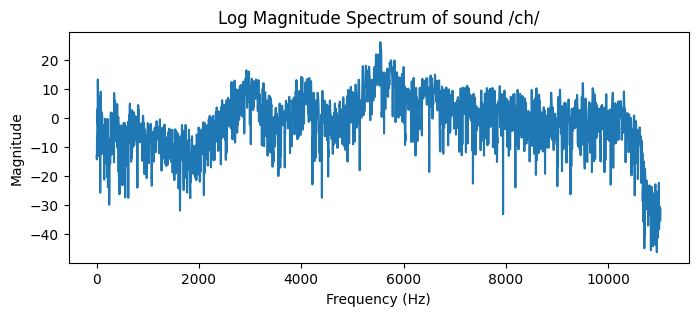

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

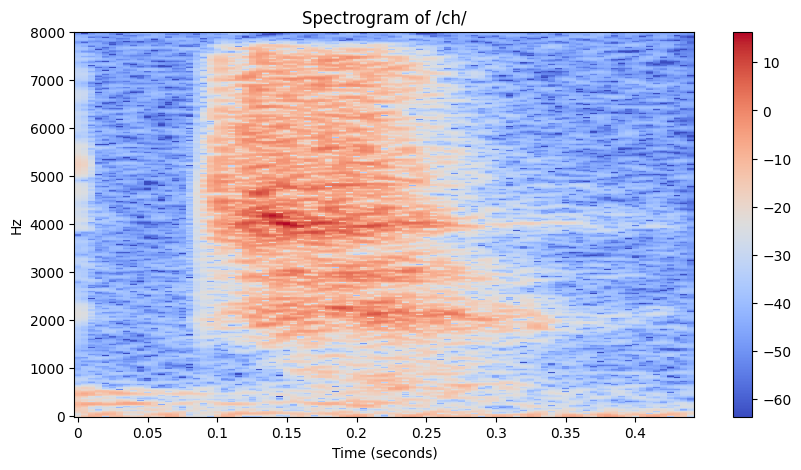

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(ch, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /ch/")
plt.colorbar()
plt.show()

##**4 BIT RESOLUTION**

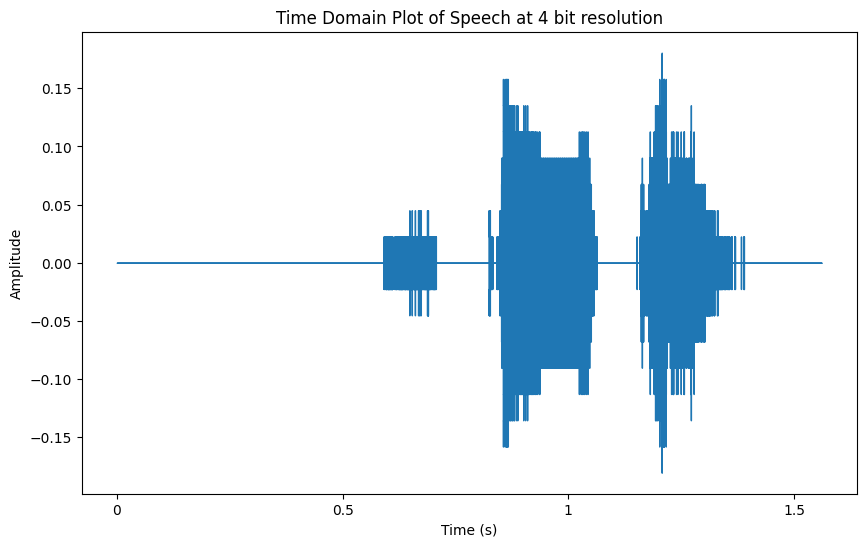

In [ ]:
speech4bits = bit_res(speech_file,4)
plt.figure(figsize=(10,6))
librosa.display.waveshow(speech4bits, sr=sr);
plt.title("Time Domain Plot of Speech at 4 bit resolution")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
ipd.Audio(speech4bits, rate=sr)

In [ ]:
s = speech4bits[int(0.4 * sr): int(0.79 * sr)]
ipd.Audio(s, rate=sr)

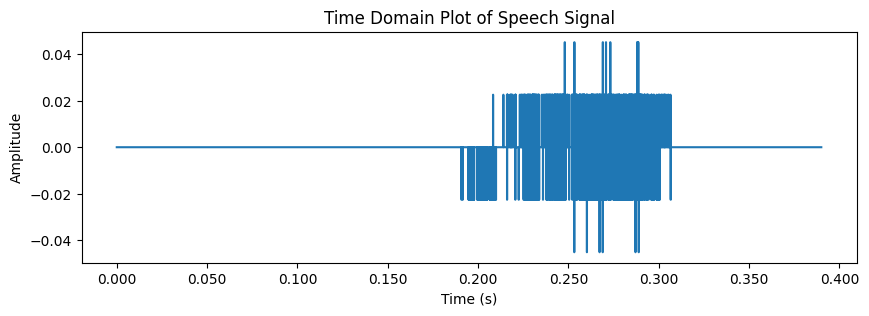

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(s, sr=sr);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(s)

6240


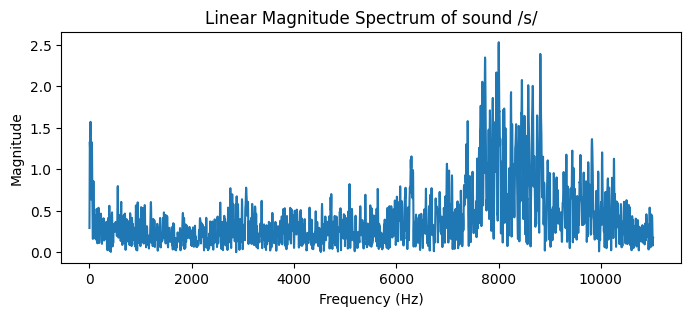

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

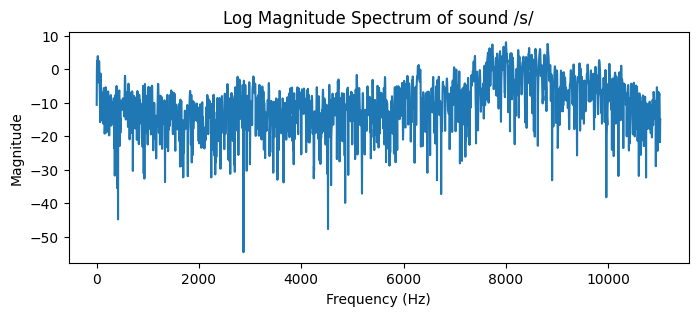

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

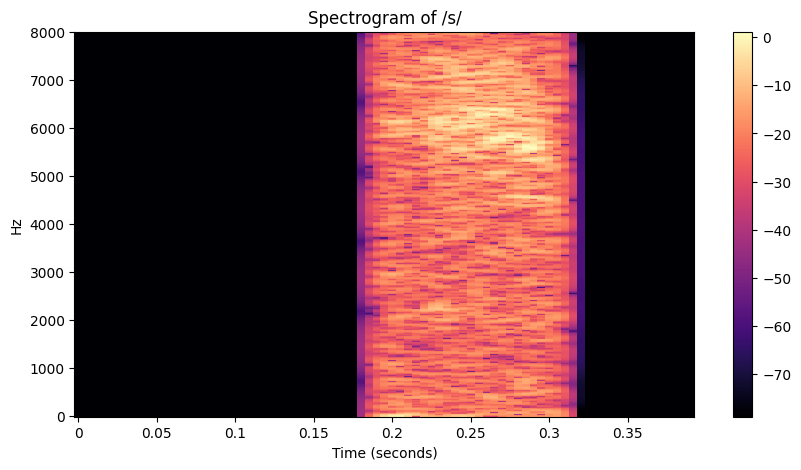

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(s, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /s/")
plt.colorbar()
plt.show()

In [ ]:
E = speech4bits[int(0.855 * sr): int(1.15 * sr)]
ipd.Audio(E, rate=sr)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(E)

4720


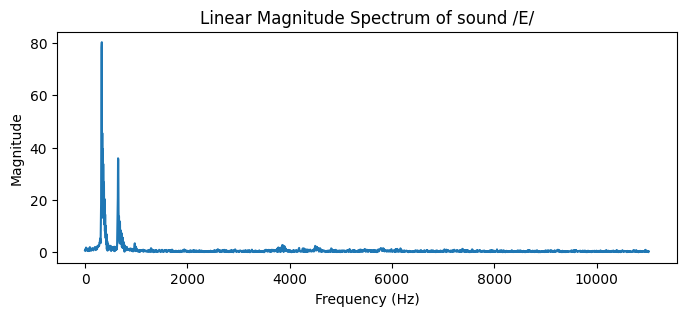

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

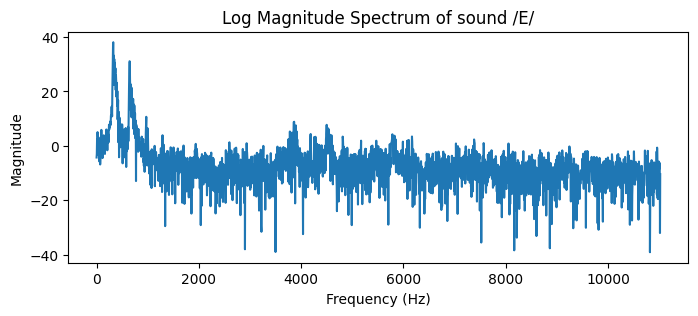

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

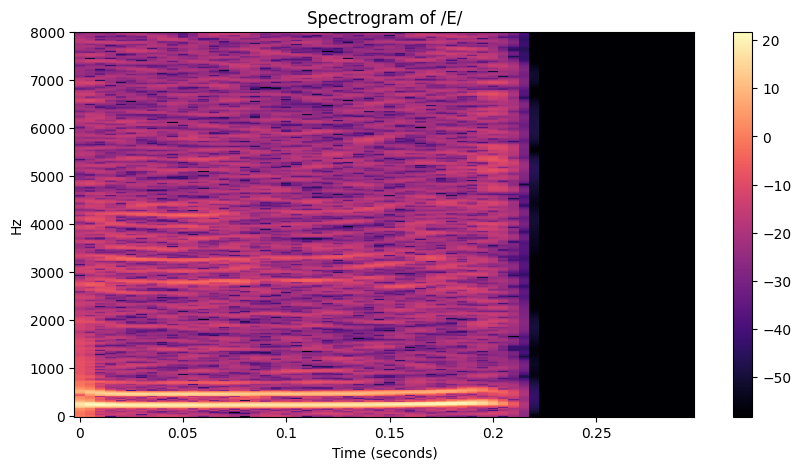

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(E, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /E/")
plt.colorbar()
plt.show()

In [ ]:
ch = speech4bits[int(1.06 * sr): int(1.5 * sr)]
ipd.Audio(ch, rate=sr)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(ch)

7040


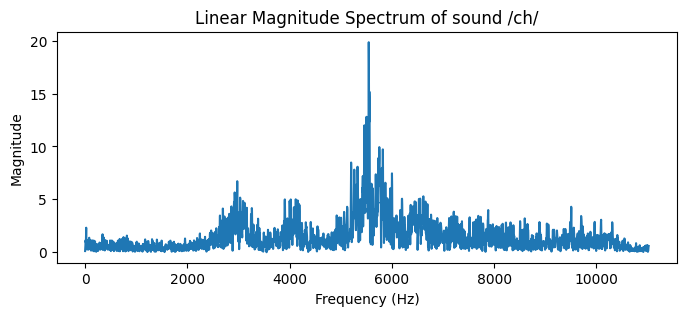

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

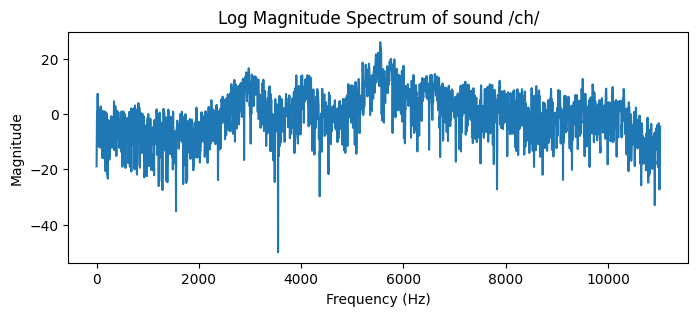

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

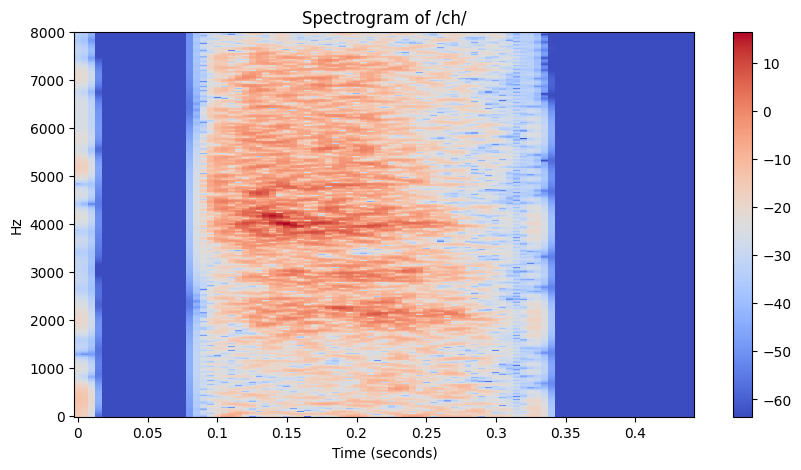

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(ch, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /ch/")
plt.colorbar()
plt.show()

##**1 BIT RESOLUTION**

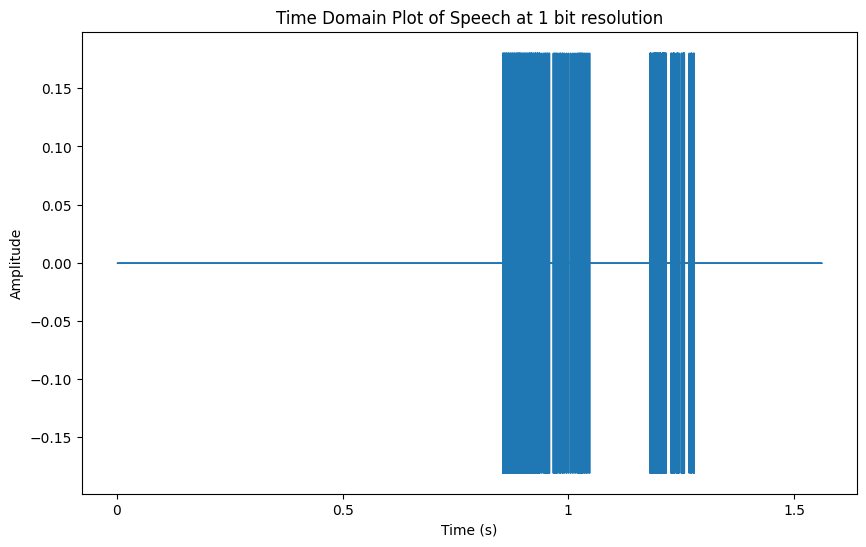

In [ ]:
speech1bit = bit_res(speech_file,1)
plt.figure(figsize=(10,6))
librosa.display.waveshow(speech1bit, sr=sr);
plt.title("Time Domain Plot of Speech at 1 bit resolution")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
ipd.Audio(speech1bit, rate=sr)

In [ ]:
s = speech1bit[int(0.4 * sr): int(0.79 * sr)]
ipd.Audio(s, rate=sr)

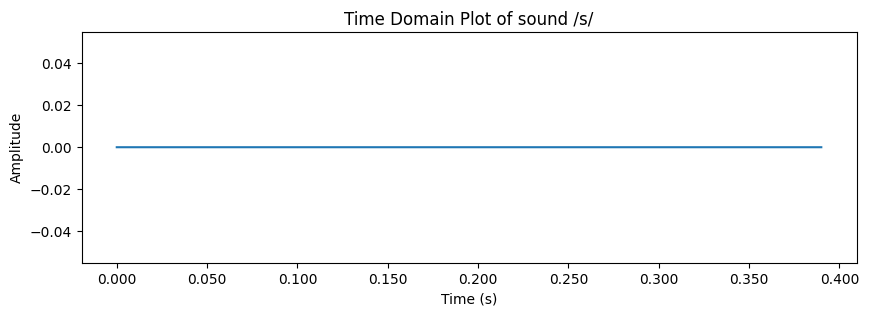

In [ ]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(s, sr=sr);
plt.title("Time Domain Plot of sound /s/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(s)

6240


<ipython-input-4-1179d51e1087>:8: RuntimeWarning: divide by zero encountered in log10
  dtft_db = 20*np.log10(np.abs(sound_dtft[0:sound_len//2]))


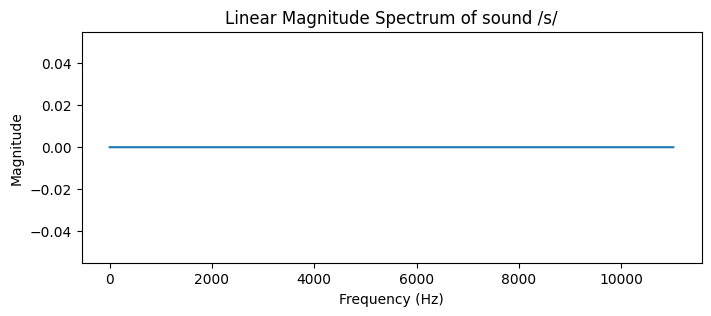

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

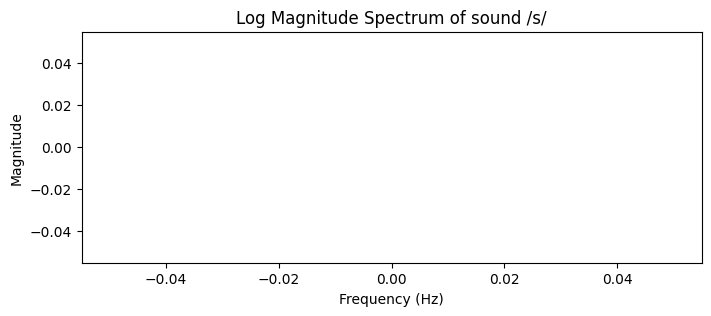

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /s/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

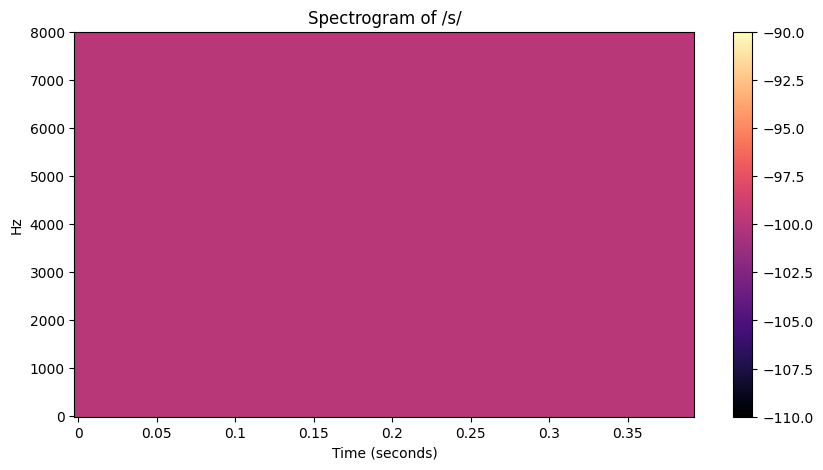

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(s, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /s/")
plt.colorbar()
plt.show()

In [ ]:
E = speech1bit[int(0.855 * sr): int(1.15 * sr)]
ipd.Audio(E, rate=sr)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(E)

4720


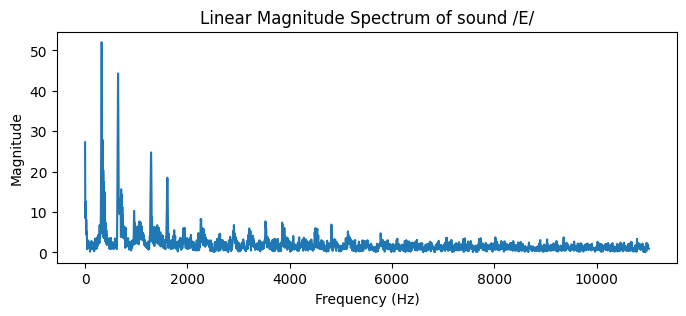

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

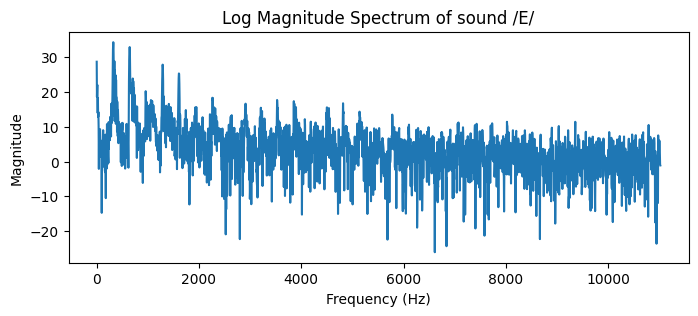

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /E/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

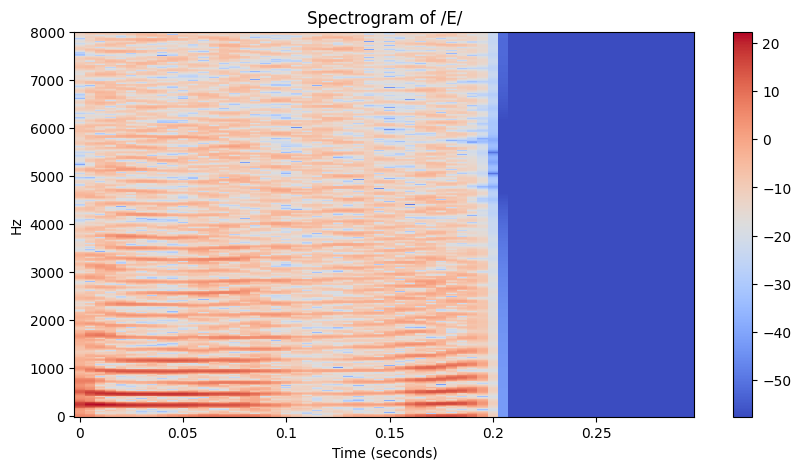

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(E, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /E/")
plt.colorbar()
plt.show()

In [ ]:
ch = speech1bit[int(1.06 * sr): int(1.5 * sr)]
ipd.Audio(ch, rate=sr)

In [ ]:
freqs,freq_lin,freq_db = magnitudeSpectrum(ch)

7040


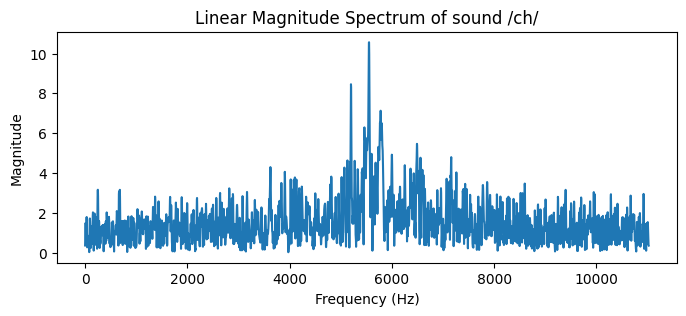

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

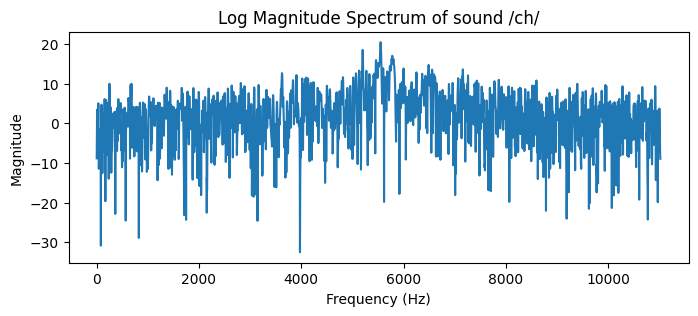

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of sound /ch/")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

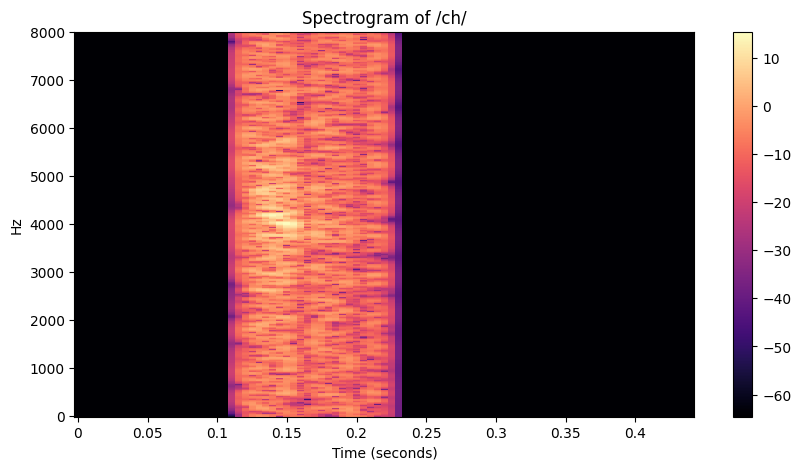

In [ ]:
plt.figure(figsize=(10,5))
frame_rate=80
D = librosa.stft(ch, n_fft=1024, win_length=480, hop_length=frame_rate)
S_db = librosa.amplitude_to_db(np.abs(D))
librosa.display.specshow(S_db,x_axis='s' ,y_axis='linear', sr=sr,hop_length=frame_rate)
plt.title("Spectrogram of /ch/")
plt.colorbar()
plt.show()